In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%ls
%cd CNNtention/

CNNtention/  assignment4/  examples/  getting_started.ipynb*  mlruns/
/teamspace/studios/this_studio/CNNtention


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import pipeline_template, mlflow, torch, torchvision
from experiment_configs import configs, ExperimentConfig, ModelConfig, DataConfig
from models.resnet_cbam_bw_layers import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.transforms import transforms
mlflow.set_tracking_uri('file:./mlruns')

In [7]:
config={"cbam_resnet20_tuning_reduction_4": lambda: ExperimentConfig(
        "CBAM Attention ResNet20 Tuning, Reduction 4, LR 0.1",
        DataConfig(name='CIFAR-10',
                   test_size=10000,
                   train_transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ]),
            test_transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])),
        ModelConfig(model=ResnetCBAM(OriginalBasicBlock, [3,3,3], 10, 4),
                    lr=0.01,
                    optimizer=torch.optim.Adam,
                    weight_decay=0.0001,
                    use_reg=True,
                    batch_size=128,
                    max_epochs=64000//(45000 // 128),
                    momentum=0.9,
                    train_split=ValidSplit(cv=0.1),
                    scheduler=LRScheduler(
                        policy=MultiStepLR,
                        milestones=[
                            16000 // (45000 // 128), # == 45
                            32000 // (45000 // 128), # == 91
                            48000 // (45000 // 128) # == 136
                        ],
                        gamma=0.1 # this is the multiplication factor ("divide it by 10")
                    ),
                    log_model=True,
                    use_early_stopping=False,
                    add_test_set_eval=False,
                    )
    )}

=== Model Details ===
ResnetCBAM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1

Files already downloaded and verified
Files already downloaded and verified


2024/12/08 11:07:40 WARNING mlflow.utils.validation: Param value 'ResnetCBAM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
...' (6915 characters) is truncated to 6000 characters to meet the length limit.


  0%|          | 0/392 [00:00<?, ?it/s]

  epoch    train_err    train_loss    valid_acc    valid_err    valid_loss      lr      dur
-------  -----------  ------------  -----------  -----------  ------------  ------  -------
      1      57.0156        1.9331       0.4232       0.5768        1.5654  0.0100  32.6936


  0%|          | 0/392 [00:00<?, ?it/s]

      2      52.8822        1.3846       0.4790       0.5210        1.6851  0.0100  31.4979


  0%|          | 0/392 [00:00<?, ?it/s]

      3      37.4889        1.1014       0.6130       0.3870        1.1068  0.0100  32.4010


  0%|          | 0/392 [00:00<?, ?it/s]

      4      37.9267        0.9540       0.6220       0.3780        1.1475  0.0100  31.5588


  0%|          | 0/392 [00:00<?, ?it/s]

      5      35.6533        0.8482       0.6388       0.3612        1.1138  0.0100  32.2675


  0%|          | 0/392 [00:00<?, ?it/s]

      6      32.8156        0.7807       0.6716       0.3284        0.9152  0.0100  31.6293


  0%|          | 0/392 [00:00<?, ?it/s]

      7      29.2222        0.7358       0.7034       0.2966        0.9072  0.0100  32.4079


  0%|          | 0/392 [00:00<?, ?it/s]

      8      27.3644        0.7051       0.7280       0.2720        0.8084  0.0100  31.8562


  0%|          | 0/392 [00:00<?, ?it/s]

      9      26.5311        0.6734       0.7230       0.2770        0.8000  0.0100  32.4950


  0%|          | 0/392 [00:00<?, ?it/s]

     10      29.1889        0.6553       0.6982       0.3018        0.9327  0.0100  31.5195


  0%|          | 0/392 [00:00<?, ?it/s]

     11      27.5867        0.6425       0.7200       0.2800        0.8211  0.0100  32.4891


  0%|          | 0/392 [00:00<?, ?it/s]

     12      26.7000        0.6358       0.7170       0.2830        0.8249  0.0100  31.6051


  0%|          | 0/392 [00:00<?, ?it/s]

     13      26.3578        0.6207       0.7282       0.2718        0.8256  0.0100  31.5089


  0%|          | 0/392 [00:00<?, ?it/s]

     14      24.3111        0.6051       0.7484       0.2516        0.7229  0.0100  32.3876


  0%|          | 0/392 [00:00<?, ?it/s]

     15      27.2156        0.5953       0.7232       0.2768        0.8263  0.0100  31.6988


  0%|          | 0/392 [00:00<?, ?it/s]

     16      21.7978        0.6049       0.7668       0.2332        0.6612  0.0100  32.5581


  0%|          | 0/392 [00:00<?, ?it/s]

     17      27.3800        0.5859       0.7214       0.2786        0.8644  0.0100  33.5261


  0%|          | 0/392 [00:00<?, ?it/s]

     18      22.7089        0.5894       0.7684       0.2316        0.7047  0.0100  31.7172


  0%|          | 0/392 [00:00<?, ?it/s]

     19      22.7867        0.5776       0.7674       0.2326        0.6869  0.0100  32.4925


  0%|          | 0/392 [00:00<?, ?it/s]

     20      22.2778        0.5797       0.7612       0.2388        0.6844  0.0100  31.4691


  0%|          | 0/392 [00:00<?, ?it/s]

     21      27.1089        0.5737       0.7200       0.2800        0.8318  0.0100  32.4385


  0%|          | 0/392 [00:00<?, ?it/s]

     22      24.4511        0.5640       0.7434       0.2566        0.7528  0.0100  31.5524


  0%|          | 0/392 [00:00<?, ?it/s]

     23      21.4956        0.5676       0.7788       0.2212        0.6704  0.0100  32.3854


  0%|          | 0/392 [00:00<?, ?it/s]

     24      22.6111        0.5617       0.7654       0.2346        0.6867  0.0100  31.4760


  0%|          | 0/392 [00:00<?, ?it/s]

     25      26.8378        0.5610       0.7204       0.2796        0.8703  0.0100  31.7048


  0%|          | 0/392 [00:00<?, ?it/s]

     26      22.1022        0.5607       0.7628       0.2372        0.6955  0.0100  32.5721


  0%|          | 0/392 [00:00<?, ?it/s]

     27      22.7111        0.5594       0.7666       0.2334        0.7250  0.0100  31.6239


  0%|          | 0/392 [00:00<?, ?it/s]

     28      20.4378        0.5541       0.7850       0.2150        0.6165  0.0100  32.5348


  0%|          | 0/392 [00:00<?, ?it/s]

     29      21.4933        0.5513       0.7738       0.2262        0.6781  0.0100  31.7958


  0%|          | 0/392 [00:00<?, ?it/s]

     30      19.6444        0.5482       0.7880       0.2120        0.6135  0.0100  32.5586


  0%|          | 0/392 [00:00<?, ?it/s]

     31      25.5378        0.5458       0.7412       0.2588        0.7683  0.0100  32.4413


  0%|          | 0/392 [00:00<?, ?it/s]

     32      25.2578        0.5512       0.7452       0.2548        0.7380  0.0100  31.6330


  0%|          | 0/392 [00:00<?, ?it/s]

     33      26.3089        0.5389       0.7224       0.2776        0.8003  0.0100  31.2235


  0%|          | 0/392 [00:00<?, ?it/s]

     34      21.4311        0.5440       0.7770       0.2230        0.6563  0.0100  32.6210


  0%|          | 0/392 [00:00<?, ?it/s]

     35      20.7244        0.5381       0.7782       0.2218        0.6589  0.0100  32.5548


  0%|          | 0/392 [00:00<?, ?it/s]

     36      24.2933        0.5459       0.7460       0.2540        0.7539  0.0100  31.6972


  0%|          | 0/392 [00:00<?, ?it/s]

     37      29.2644        0.5387       0.7098       0.2902        0.8480  0.0100  32.4870


  0%|          | 0/392 [00:00<?, ?it/s]

     38      24.4422        0.5393       0.7442       0.2558        0.7644  0.0100  31.6044


  0%|          | 0/392 [00:00<?, ?it/s]

     39      23.3622        0.5338       0.7628       0.2372        0.6931  0.0100  31.6079


  0%|          | 0/392 [00:00<?, ?it/s]

     40      28.8000        0.5388       0.7170       0.2830        0.9110  0.0100  32.4142


  0%|          | 0/392 [00:00<?, ?it/s]

     41      18.3000        0.5363       0.8076       0.1924        0.5646  0.0100  31.7230


  0%|          | 0/392 [00:00<?, ?it/s]

     42      20.5889        0.5346       0.7798       0.2202        0.6434  0.0100  32.5328


  0%|          | 0/392 [00:00<?, ?it/s]

     43      19.9689        0.5246       0.7932       0.2068        0.6162  0.0100  31.6828


  0%|          | 0/392 [00:00<?, ?it/s]

     44      20.9378        0.5320       0.7852       0.2148        0.6242  0.0100  32.5117


  0%|          | 0/392 [00:00<?, ?it/s]

     45      25.8089        0.5278       0.7388       0.2612        0.8440  0.0100  31.7561


  0%|          | 0/392 [00:00<?, ?it/s]

     46      12.3533        0.4106       0.8604       0.1396        0.4065  0.0010  32.5414


  0%|          | 0/392 [00:00<?, ?it/s]

     47      11.4244        0.3667       0.8638       0.1362        0.4038  0.0010  31.6463


  0%|          | 0/392 [00:00<?, ?it/s]

     48      11.3067        0.3488       0.8628       0.1372        0.3942  0.0010  32.5055


  0%|          | 0/392 [00:00<?, ?it/s]

     49      10.8644        0.3424       0.8662       0.1338        0.3948  0.0010  32.6168


  0%|          | 0/392 [00:00<?, ?it/s]

     50      10.5356        0.3292       0.8700       0.1300        0.3906  0.0010  31.5294


  0%|          | 0/392 [00:00<?, ?it/s]

     51      10.0867        0.3194       0.8710       0.1290        0.3952  0.0010  32.3922


  0%|          | 0/392 [00:00<?, ?it/s]

     52       9.9111        0.3151       0.8744       0.1256        0.3766  0.0010  31.4573


  0%|          | 0/392 [00:00<?, ?it/s]

     53       9.7689        0.3080       0.8690       0.1310        0.3842  0.0010  31.4998


  0%|          | 0/392 [00:00<?, ?it/s]

     54       9.9422        0.3033       0.8668       0.1332        0.3893  0.0010  31.8099


  0%|          | 0/392 [00:00<?, ?it/s]

     55       9.6200        0.2951       0.8700       0.1300        0.3768  0.0010  31.6743


  0%|          | 0/392 [00:00<?, ?it/s]

     56       9.4111        0.2915       0.8726       0.1274        0.3671  0.0010  31.5139


  0%|          | 0/392 [00:00<?, ?it/s]

     57       9.4400        0.2835       0.8716       0.1284        0.3805  0.0010  32.6974


  0%|          | 0/392 [00:00<?, ?it/s]

     58       9.3467        0.2830       0.8730       0.1270        0.3764  0.0010  31.7801


  0%|          | 0/392 [00:00<?, ?it/s]

     59       9.4822        0.2769       0.8772       0.1228        0.3780  0.0010  32.5437


  0%|          | 0/392 [00:00<?, ?it/s]

     60       8.9956        0.2772       0.8652       0.1348        0.3866  0.0010  32.2425


  0%|          | 0/392 [00:00<?, ?it/s]

     61       9.1622        0.2688       0.8722       0.1278        0.3794  0.0010  32.7848


  0%|          | 0/392 [00:00<?, ?it/s]

     62       8.6667        0.2661       0.8776       0.1224        0.3661  0.0010  32.8085


  0%|          | 0/392 [00:00<?, ?it/s]

     63       8.6000        0.2674       0.8654       0.1346        0.3901  0.0010  31.7941


  0%|          | 0/392 [00:00<?, ?it/s]

     64       8.5178        0.2612       0.8782       0.1218        0.3607  0.0010  32.7990


  0%|          | 0/392 [00:00<?, ?it/s]

     65       8.6111        0.2596       0.8776       0.1224        0.3831  0.0010  31.9471


  0%|          | 0/392 [00:00<?, ?it/s]

     66       8.1711        0.2587       0.8746       0.1254        0.3709  0.0010  32.6503


  0%|          | 0/392 [00:00<?, ?it/s]

     67       8.3800        0.2574       0.8764       0.1236        0.3636  0.0010  32.7040


  0%|          | 0/392 [00:00<?, ?it/s]

     68       8.1333        0.2573       0.8760       0.1240        0.3686  0.0010  31.7897


  0%|          | 0/392 [00:00<?, ?it/s]

     69       8.5533        0.2499       0.8806       0.1194        0.3638  0.0010  32.7294


  0%|          | 0/392 [00:00<?, ?it/s]

     70       7.7911        0.2513       0.8786       0.1214        0.3683  0.0010  32.6881


  0%|          | 0/392 [00:00<?, ?it/s]

     71       8.0667        0.2473       0.8756       0.1244        0.3671  0.0010  31.7585


  0%|          | 0/392 [00:00<?, ?it/s]

     72       8.0578        0.2456       0.8812       0.1188        0.3650  0.0010  32.7360


  0%|          | 0/392 [00:00<?, ?it/s]

     73       8.2400        0.2431       0.8748       0.1252        0.3630  0.0010  31.7338


  0%|          | 0/392 [00:00<?, ?it/s]

     74       7.8689        0.2402       0.8770       0.1230        0.3757  0.0010  32.6997


  0%|          | 0/392 [00:00<?, ?it/s]

     75       7.8978        0.2407       0.8782       0.1218        0.3752  0.0010  31.7881


  0%|          | 0/392 [00:00<?, ?it/s]

     76       8.0911        0.2343       0.8748       0.1252        0.3895  0.0010  32.6181


  0%|          | 0/392 [00:00<?, ?it/s]

     77       7.7444        0.2379       0.8778       0.1222        0.3754  0.0010  31.6956


  0%|          | 0/392 [00:00<?, ?it/s]

     78       7.5822        0.2329       0.8778       0.1222        0.3770  0.0010  32.6467


  0%|          | 0/392 [00:00<?, ?it/s]

     79       8.2800        0.2302       0.8702       0.1298        0.4067  0.0010  32.6523


  0%|          | 0/392 [00:00<?, ?it/s]

     80       7.6556        0.2297       0.8758       0.1242        0.3789  0.0010  31.8557


  0%|          | 0/392 [00:00<?, ?it/s]

     81       7.6289        0.2281       0.8750       0.1250        0.3958  0.0010  32.8328


  0%|          | 0/392 [00:00<?, ?it/s]

     82       7.3267        0.2221       0.8782       0.1218        0.3818  0.0010  31.8226


  0%|          | 0/392 [00:00<?, ?it/s]

     83       7.3867        0.2259       0.8792       0.1208        0.3749  0.0010  32.7577


  0%|          | 0/392 [00:00<?, ?it/s]

     84       7.6489        0.2244       0.8774       0.1226        0.3913  0.0010  32.7527


  0%|          | 0/392 [00:00<?, ?it/s]

     85       7.1978        0.2212       0.8730       0.1270        0.3788  0.0010  31.7078


  0%|          | 0/392 [00:00<?, ?it/s]

     86       7.3289        0.2232       0.8760       0.1240        0.3855  0.0010  32.6900


  0%|          | 0/392 [00:00<?, ?it/s]

     87       7.4622        0.2202       0.8784       0.1216        0.3848  0.0010  32.5473


  0%|          | 0/392 [00:00<?, ?it/s]

     88       7.3156        0.2174       0.8756       0.1244        0.3937  0.0010  32.5607


  0%|          | 0/392 [00:00<?, ?it/s]

     89       6.9733        0.2180       0.8746       0.1254        0.3908  0.0010  32.7700


  0%|          | 0/392 [00:00<?, ?it/s]

     90       7.2689        0.2179       0.8732       0.1268        0.3811  0.0010  32.5606


  0%|          | 0/392 [00:00<?, ?it/s]

     91       7.3156        0.2154       0.8794       0.1206        0.3914  0.0010  32.5745


  0%|          | 0/392 [00:00<?, ?it/s]

     92       5.6689        0.1872       0.8904       0.1096        0.3505  0.0001  32.6559


  0%|          | 0/392 [00:00<?, ?it/s]

     93       5.3289        0.1759       0.8892       0.1108        0.3458  0.0001  32.5416


  0%|          | 0/392 [00:00<?, ?it/s]

     94       5.4578        0.1720       0.8854       0.1146        0.3648  0.0001  32.3920


  0%|          | 0/392 [00:00<?, ?it/s]

     95       5.1933        0.1679       0.8828       0.1172        0.3590  0.0001  32.5708


  0%|          | 0/392 [00:00<?, ?it/s]

     96       5.1289        0.1666       0.8876       0.1124        0.3478  0.0001  32.5583


  0%|          | 0/392 [00:00<?, ?it/s]

     97       5.2311        0.1659       0.8918       0.1082        0.3496  0.0001  33.5569


  0%|          | 0/392 [00:00<?, ?it/s]

     98       5.0578        0.1669       0.8908       0.1092        0.3574  0.0001  32.1408


  0%|          | 0/392 [00:00<?, ?it/s]

     99       5.0089        0.1634       0.8836       0.1164        0.3644  0.0001  33.6625


  0%|          | 0/392 [00:00<?, ?it/s]

    100       5.0711        0.1625       0.8924       0.1076        0.3369  0.0001  33.4801


  0%|          | 0/392 [00:00<?, ?it/s]

    101       5.0489        0.1619       0.8878       0.1122        0.3462  0.0001  33.6715


  0%|          | 0/392 [00:00<?, ?it/s]

    102       5.0800        0.1606       0.8860       0.1140        0.3509  0.0001  33.3265


  0%|          | 0/392 [00:00<?, ?it/s]

    103       4.9133        0.1586       0.8926       0.1074        0.3638  0.0001  31.8610


  0%|          | 0/392 [00:00<?, ?it/s]

    104       4.9244        0.1598       0.8870       0.1130        0.3570  0.0001  32.6262


  0%|          | 0/392 [00:00<?, ?it/s]

    105       4.9622        0.1585       0.8910       0.1090        0.3536  0.0001  32.6289


  0%|          | 0/392 [00:00<?, ?it/s]

    106       4.8667        0.1573       0.8838       0.1162        0.3550  0.0001  31.7415


  0%|          | 0/392 [00:00<?, ?it/s]

    107       4.6844        0.1560       0.8848       0.1152        0.3657  0.0001  32.5737


  0%|          | 0/392 [00:00<?, ?it/s]

    108       4.9089        0.1564       0.8826       0.1174        0.3729  0.0001  32.6759


  0%|          | 0/392 [00:00<?, ?it/s]

    109       4.7067        0.1561       0.8836       0.1164        0.3611  0.0001  31.6629


  0%|          | 0/392 [00:00<?, ?it/s]

    110       4.7956        0.1537       0.8880       0.1120        0.3589  0.0001  31.4545


  0%|          | 0/392 [00:00<?, ?it/s]

    111       4.8289        0.1531       0.8884       0.1116        0.3623  0.0001  32.5246


  0%|          | 0/392 [00:00<?, ?it/s]

    112       4.9044        0.1546       0.8872       0.1128        0.3705  0.0001  32.5075


  0%|          | 0/392 [00:00<?, ?it/s]

    113       4.6844        0.1529       0.8818       0.1182        0.3706  0.0001  31.5792


  0%|          | 0/392 [00:00<?, ?it/s]

    114       4.7422        0.1505       0.8874       0.1126        0.3661  0.0001  31.4682


  0%|          | 0/392 [00:00<?, ?it/s]

    115       4.6578        0.1514       0.8872       0.1128        0.3624  0.0001  31.6508


  0%|          | 0/392 [00:00<?, ?it/s]

    116       4.6622        0.1481       0.8920       0.1080        0.3640  0.0001  32.6118


  0%|          | 0/392 [00:00<?, ?it/s]

    117       4.6111        0.1489       0.8856       0.1144        0.3755  0.0001  32.6010


  0%|          | 0/392 [00:00<?, ?it/s]

    118       4.6356        0.1494       0.8860       0.1140        0.3738  0.0001  31.7104


  0%|          | 0/392 [00:00<?, ?it/s]

    119       4.6200        0.1486       0.8876       0.1124        0.3578  0.0001  32.8545


  0%|          | 0/392 [00:00<?, ?it/s]

    120       4.5978        0.1483       0.8872       0.1128        0.3693  0.0001  32.5414


  0%|          | 0/392 [00:00<?, ?it/s]

    121       4.6511        0.1489       0.8862       0.1138        0.3738  0.0001  31.6867


  0%|          | 0/392 [00:00<?, ?it/s]

    122       4.5756        0.1482       0.8860       0.1140        0.3699  0.0001  32.5258


  0%|          | 0/392 [00:00<?, ?it/s]

    123       4.5867        0.1475       0.8870       0.1130        0.3643  0.0001  32.5565


  0%|          | 0/392 [00:00<?, ?it/s]

    124       4.6467        0.1472       0.8838       0.1162        0.3926  0.0001  32.5175


  0%|          | 0/392 [00:00<?, ?it/s]

    125       4.5889        0.1473       0.8820       0.1180        0.3754  0.0001  31.6614


  0%|          | 0/392 [00:00<?, ?it/s]

    126       4.4333        0.1468       0.8856       0.1144        0.3841  0.0001  31.5149


  0%|          | 0/392 [00:00<?, ?it/s]

    127       4.4733        0.1441       0.8858       0.1142        0.3841  0.0001  32.6398


  0%|          | 0/392 [00:00<?, ?it/s]

    128       4.3844        0.1449       0.8880       0.1120        0.3491  0.0001  31.5957


  0%|          | 0/392 [00:00<?, ?it/s]

    129       4.5578        0.1422       0.8884       0.1116        0.3705  0.0001  32.5527


  0%|          | 0/392 [00:00<?, ?it/s]

    130       4.3600        0.1433       0.8892       0.1108        0.3775  0.0001  31.7711


  0%|          | 0/392 [00:00<?, ?it/s]

    131       4.4444        0.1439       0.8838       0.1162        0.3811  0.0001  32.4921


  0%|          | 0/392 [00:00<?, ?it/s]

    132       4.3911        0.1388       0.8834       0.1166        0.3667  0.0001  31.6798


  0%|          | 0/392 [00:00<?, ?it/s]

    133       4.4422        0.1390       0.8934       0.1066        0.3727  0.0001  31.8040


  0%|          | 0/392 [00:00<?, ?it/s]

    134       4.3556        0.1423       0.8842       0.1158        0.3762  0.0001  32.4218


  0%|          | 0/392 [00:00<?, ?it/s]

    135       4.3089        0.1417       0.8880       0.1120        0.3655  0.0001  31.6380


  0%|          | 0/392 [00:00<?, ?it/s]

    136       4.5000        0.1436       0.8866       0.1134        0.3854  0.0001  32.6871


  0%|          | 0/392 [00:00<?, ?it/s]

    137       4.3022        0.1392       0.8888       0.1112        0.3568  0.0000  32.6515


  0%|          | 0/392 [00:00<?, ?it/s]

    138       4.3267        0.1361       0.8864       0.1136        0.3760  0.0000  32.5192


  0%|          | 0/392 [00:00<?, ?it/s]

    139       4.3022        0.1383       0.8856       0.1144        0.3715  0.0000  32.5737


  0%|          | 0/392 [00:00<?, ?it/s]

    140       4.2800        0.1368       0.8784       0.1216        0.3885  0.0000  31.5232


  0%|          | 0/392 [00:00<?, ?it/s]

    141       4.2044        0.1394       0.8862       0.1138        0.3804  0.0000  31.7157


  0%|          | 0/392 [00:00<?, ?it/s]

    142       4.1689        0.1348       0.8920       0.1080        0.3719  0.0000  31.4945


  0%|          | 0/392 [00:00<?, ?it/s]

    143       4.3133        0.1353       0.8882       0.1118        0.3862  0.0000  31.6212


  0%|          | 0/392 [00:00<?, ?it/s]

    144       4.1267        0.1372       0.8880       0.1120        0.3767  0.0000  32.3563


  0%|          | 0/392 [00:00<?, ?it/s]

    145       4.3200        0.1336       0.8862       0.1138        0.3693  0.0000  31.5981


  0%|          | 0/392 [00:00<?, ?it/s]

    146       4.1889        0.1352       0.8898       0.1102        0.3801  0.0000  31.5977


  0%|          | 0/392 [00:00<?, ?it/s]

    147       4.1444        0.1347       0.8860       0.1140        0.3742  0.0000  31.6375


  0%|          | 0/392 [00:00<?, ?it/s]

    148       4.2200        0.1360       0.8884       0.1116        0.3721  0.0000  31.6234


  0%|          | 0/392 [00:00<?, ?it/s]

    149       4.2778        0.1355       0.8878       0.1122        0.3798  0.0000  33.0316


  0%|          | 0/392 [00:00<?, ?it/s]

    150       4.3311        0.1350       0.8852       0.1148        0.3800  0.0000  31.5627


  0%|          | 0/392 [00:00<?, ?it/s]

    151       4.0956        0.1339       0.8900       0.1100        0.3730  0.0000  32.3821


  0%|          | 0/392 [00:00<?, ?it/s]

    152       4.1956        0.1363       0.8878       0.1122        0.3759  0.0000  31.4064


  0%|          | 0/392 [00:00<?, ?it/s]

    153       4.2889        0.1350       0.8876       0.1124        0.3867  0.0000  32.5028


  0%|          | 0/392 [00:00<?, ?it/s]

    154       4.2111        0.1354       0.8894       0.1106        0.3688  0.0000  32.5608


  0%|          | 0/392 [00:00<?, ?it/s]

    155       4.2978        0.1347       0.8866       0.1134        0.3712  0.0000  31.5992


  0%|          | 0/392 [00:00<?, ?it/s]

    156       4.1956        0.1358       0.8864       0.1136        0.3824  0.0000  31.8890


  0%|          | 0/392 [00:00<?, ?it/s]

    157       4.3133        0.1353       0.8838       0.1162        0.3704  0.0000  31.6405


  0%|          | 0/392 [00:00<?, ?it/s]

    158       4.1378        0.1301       0.8894       0.1106        0.3693  0.0000  32.5848


  0%|          | 0/392 [00:00<?, ?it/s]

    159       4.1133        0.1347       0.8822       0.1178        0.3803  0.0000  31.5672


  0%|          | 0/392 [00:00<?, ?it/s]

    160       4.1689        0.1336       0.8876       0.1124        0.3885  0.0000  32.4880


  0%|          | 0/392 [00:00<?, ?it/s]

    161       3.9444        0.1344       0.8850       0.1150        0.3809  0.0000  31.4503


  0%|          | 0/392 [00:00<?, ?it/s]

    162       4.1667        0.1329       0.8892       0.1108        0.3740  0.0000  31.4190


  0%|          | 0/392 [00:00<?, ?it/s]

    163       4.1689        0.1334       0.8894       0.1106        0.3742  0.0000  31.5240


  0%|          | 0/392 [00:00<?, ?it/s]

    164       4.2111        0.1321       0.8870       0.1130        0.3782  0.0000  31.9666


  0%|          | 0/392 [00:00<?, ?it/s]

    165       4.0822        0.1325       0.8884       0.1116        0.3763  0.0000  31.7525


  0%|          | 0/392 [00:00<?, ?it/s]

    166       4.1200        0.1362       0.8904       0.1096        0.3799  0.0000  31.6273


  0%|          | 0/392 [00:00<?, ?it/s]

    167       4.2178        0.1354       0.8896       0.1104        0.3828  0.0000  32.3853


  0%|          | 0/392 [00:00<?, ?it/s]

    168       4.1733        0.1346       0.8830       0.1170        0.3931  0.0000  32.1181


  0%|          | 0/392 [00:00<?, ?it/s]

    169       4.1733        0.1355       0.8894       0.1106        0.3671  0.0000  31.5246


  0%|          | 0/392 [00:00<?, ?it/s]

    170       4.1244        0.1356       0.8872       0.1128        0.3726  0.0000  31.5161


  0%|          | 0/392 [00:00<?, ?it/s]

    171       4.1933        0.1333       0.8842       0.1158        0.3869  0.0000  31.5974


  0%|          | 0/392 [00:00<?, ?it/s]

    172       4.1622        0.1330       0.8884       0.1116        0.3794  0.0000  32.3989


  0%|          | 0/392 [00:00<?, ?it/s]

    173       4.1956        0.1343       0.8812       0.1188        0.3934  0.0000  31.5048


  0%|          | 0/392 [00:00<?, ?it/s]

    174       4.1022        0.1328       0.8874       0.1126        0.3799  0.0000  31.5940


  0%|          | 0/392 [00:00<?, ?it/s]

    175       4.1867        0.1330       0.8888       0.1112        0.3705  0.0000  31.4126


  0%|          | 0/392 [00:00<?, ?it/s]

    176       4.1111        0.1332       0.8868       0.1132        0.3808  0.0000  32.6927


  0%|          | 0/392 [00:00<?, ?it/s]

    177       4.2000        0.1316       0.8814       0.1186        0.3852  0.0000  32.4565


  0%|          | 0/392 [00:00<?, ?it/s]

    178       4.1044        0.1323       0.8898       0.1102        0.3732  0.0000  32.3353


  0%|          | 0/392 [00:00<?, ?it/s]

    179       4.3244        0.1340       0.8888       0.1112        0.3845  0.0000  31.5674


  0%|          | 0/392 [00:00<?, ?it/s]

    180       4.1756        0.1312       0.8852       0.1148        0.3968  0.0000  32.5773


  0%|          | 0/392 [00:00<?, ?it/s]

    181       4.1222        0.1356       0.8858       0.1142        0.3657  0.0000  31.7009


  0%|          | 0/392 [00:00<?, ?it/s]

    182       4.1889        0.1313       0.8844       0.1156        0.3868  0.0000  32.4790
Test set accuracy: 0.8905
Test set error: 10.950000000000005


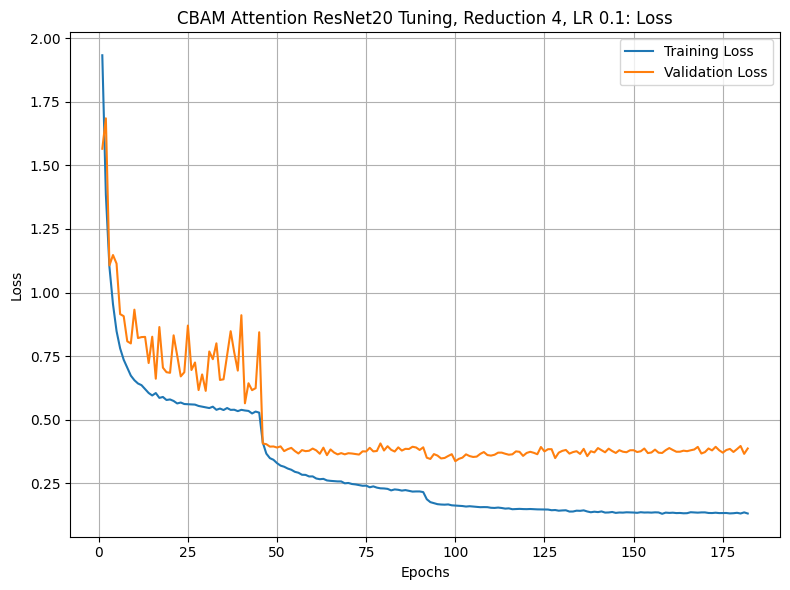

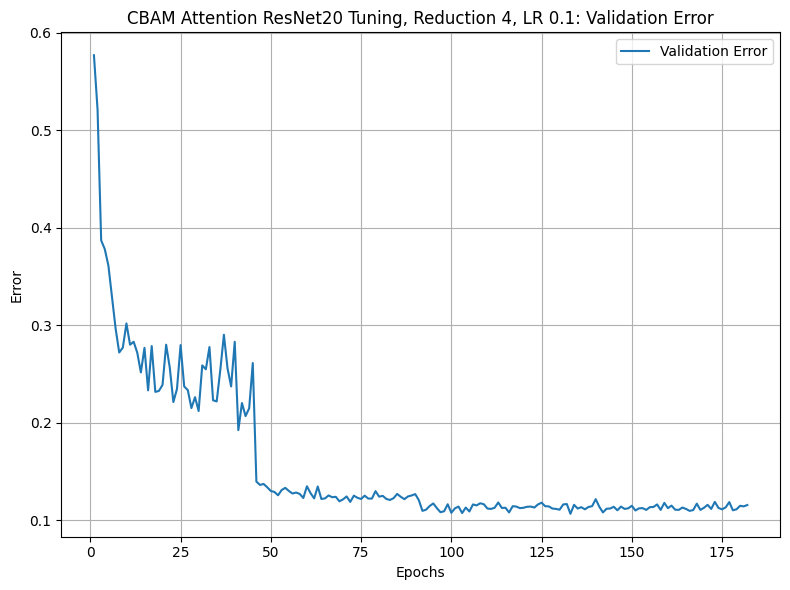

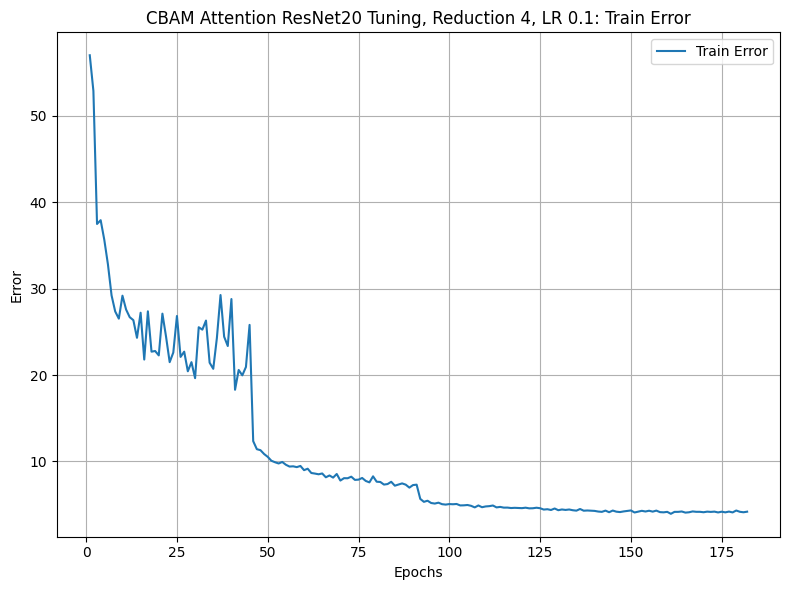

2024/12/08 13:47:57 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.17.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.17.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/08 13:47:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [9]:
pipeline_template.main('cbam_resnet20_tuning_reduction_4', True, config)
# pipeline_template.main('debug_config')